# Perceptron Algorithm

### What are the weights and bias for the AND perceptron?

Set the weights (`weight1`, `weight2`) and bias (`bias`) to values that will correctly determine the AND operation as shown above.
More than one set of values will work!

In [25]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 9.0
weight2 = 6.0
bias = -1.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got 2 wrong.  Keep trying!

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -1.0                    0          Yes
       0          1                   5.0                    1           No
       1          0                   8.0                    1           No
       1          1                  14.0                    1          Yes


## OR Perceptron

The OR perceptron is very similar to an AND perceptron. In the image below, the OR perceptron has the same line as the AND perceptron, except the line is shifted down. What can you do to the weights and/or bias to achieve this? Use the following AND perceptron to create an OR Perceptron.

### What are two ways to go from an AND perceptron to an OR perceptron?
- Increase weights
- Decrease the magnitude of the bias


## NOT Perceptron

Unlike the other perceptrons we looked at, the NOT operation only cares about one input. The operation returns a `0` if the input is `1` and a `1` if it's a `0`. The other inputs to the perceptron are ignored.

In this quiz, you'll set the weights (`weight1`, `weight2`) and bias bias to the values that calculate the NOT operation on the second input and ignores the first input.


In [26]:
# TODO: Set weight1, weight2, and bias
weight1 = -0.7
weight2 = -6.0
bias = 2.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   2.0                    1          Yes
       0          1                  -4.0                    0          Yes
       1          0                   1.3                    1          Yes
       1          1                  -4.7                    0          Yes


## Coding the Perceptron Algorithm

Time to code! In this quiz, you'll have the chance to implement the perceptron algorithm to separate the following data (given in the file datasets/perceptron.csv).

![data](../assets/points.png)

The Perceptron is comprised of a data structure (weights) and separate procedures for training and applying the structure. The structure is really just a vector of weights (one for each expected input) and a bias term.

Recall that the perceptron step works as follows. For a point with coordinates $(p,q)$, label $y$, and prediction given by equation $\hat{y}=step(w_1x_1+w_2x_2+b)$:

- If the point correctly classified, do nothing.
- If the point is classified positive, but it has a negative label, subtract $\alpha p,\alpha q$, and $\alpha$ from $w_1, w_2$ and $b$ respectively.
- If the point is classifed negatie, but it has a positive label, add $\alpha p,\alpha q$, and $\alpha$ from $w_1, w_2$ and $b$ respectively.




[-0.05239463]


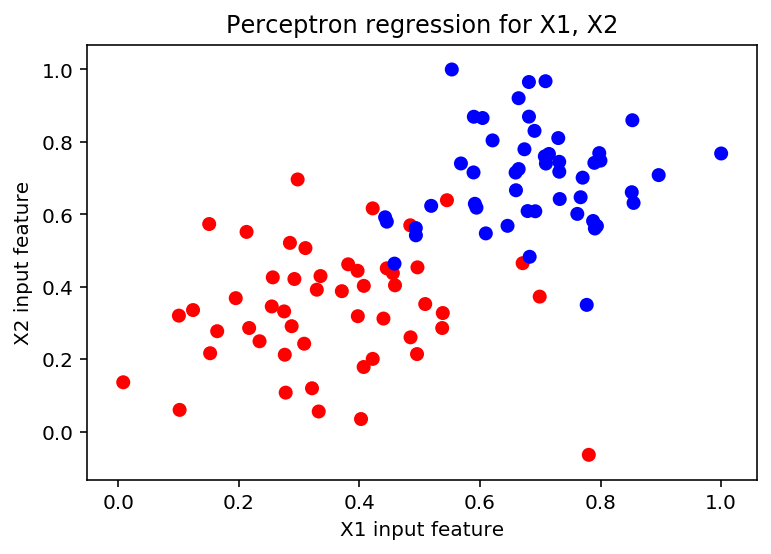

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate 
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


data = pd.read_csv('../datasets/perceptron.csv', header = None)
X = data.iloc[:, :2].values
y = data.iloc[:, -1].values

boundary_lines = trainPerceptronAlgorithm(X, y)

x1 = X[:, 0]
x2 = X[:, 1]
color = ['red' if value == 1 else 'blue' for value in y]
plt.scatter(x1, x2, marker='o', color=color)
plt.xlabel('X1 input feature')
plt.ylabel('X2 input feature')
plt.title('Perceptron regression for X1, X2')
# plt.subplot(boundary_lines[0][0])
print(boundary_lines[0][0])
plt.show()
